<a href="https://colab.research.google.com/github/KrRA1122/Machine-Learning-/blob/main/Diabetes_project_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns

In [3]:
diabetes_data=pd.read_csv('/content/diabetes.csv')

In [4]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_data.shape

(768, 9)

In [7]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**0-->Non Diabetics, 1--> Diabetic**

<Axes: >

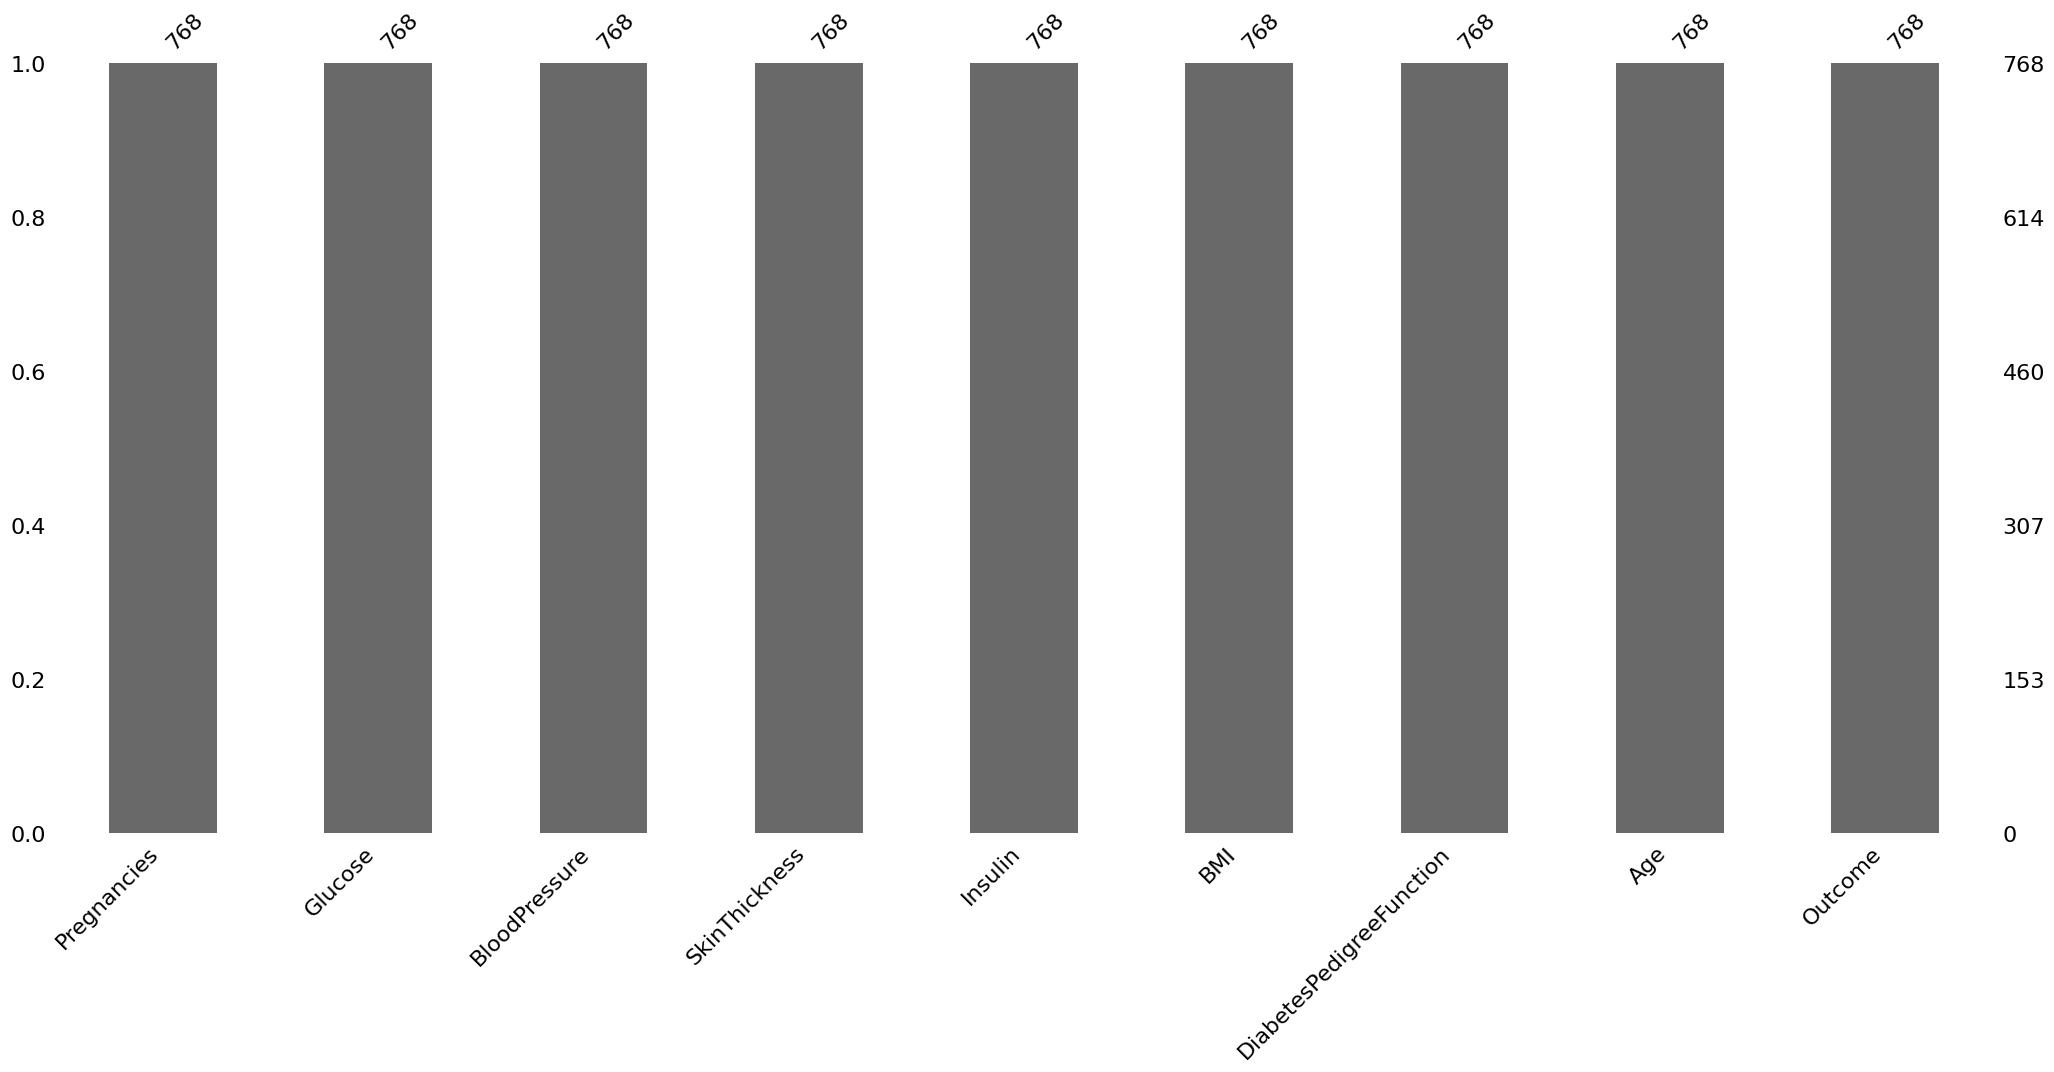

In [10]:
##Checking null values


msno.bar(diabetes_data)

<Axes: >

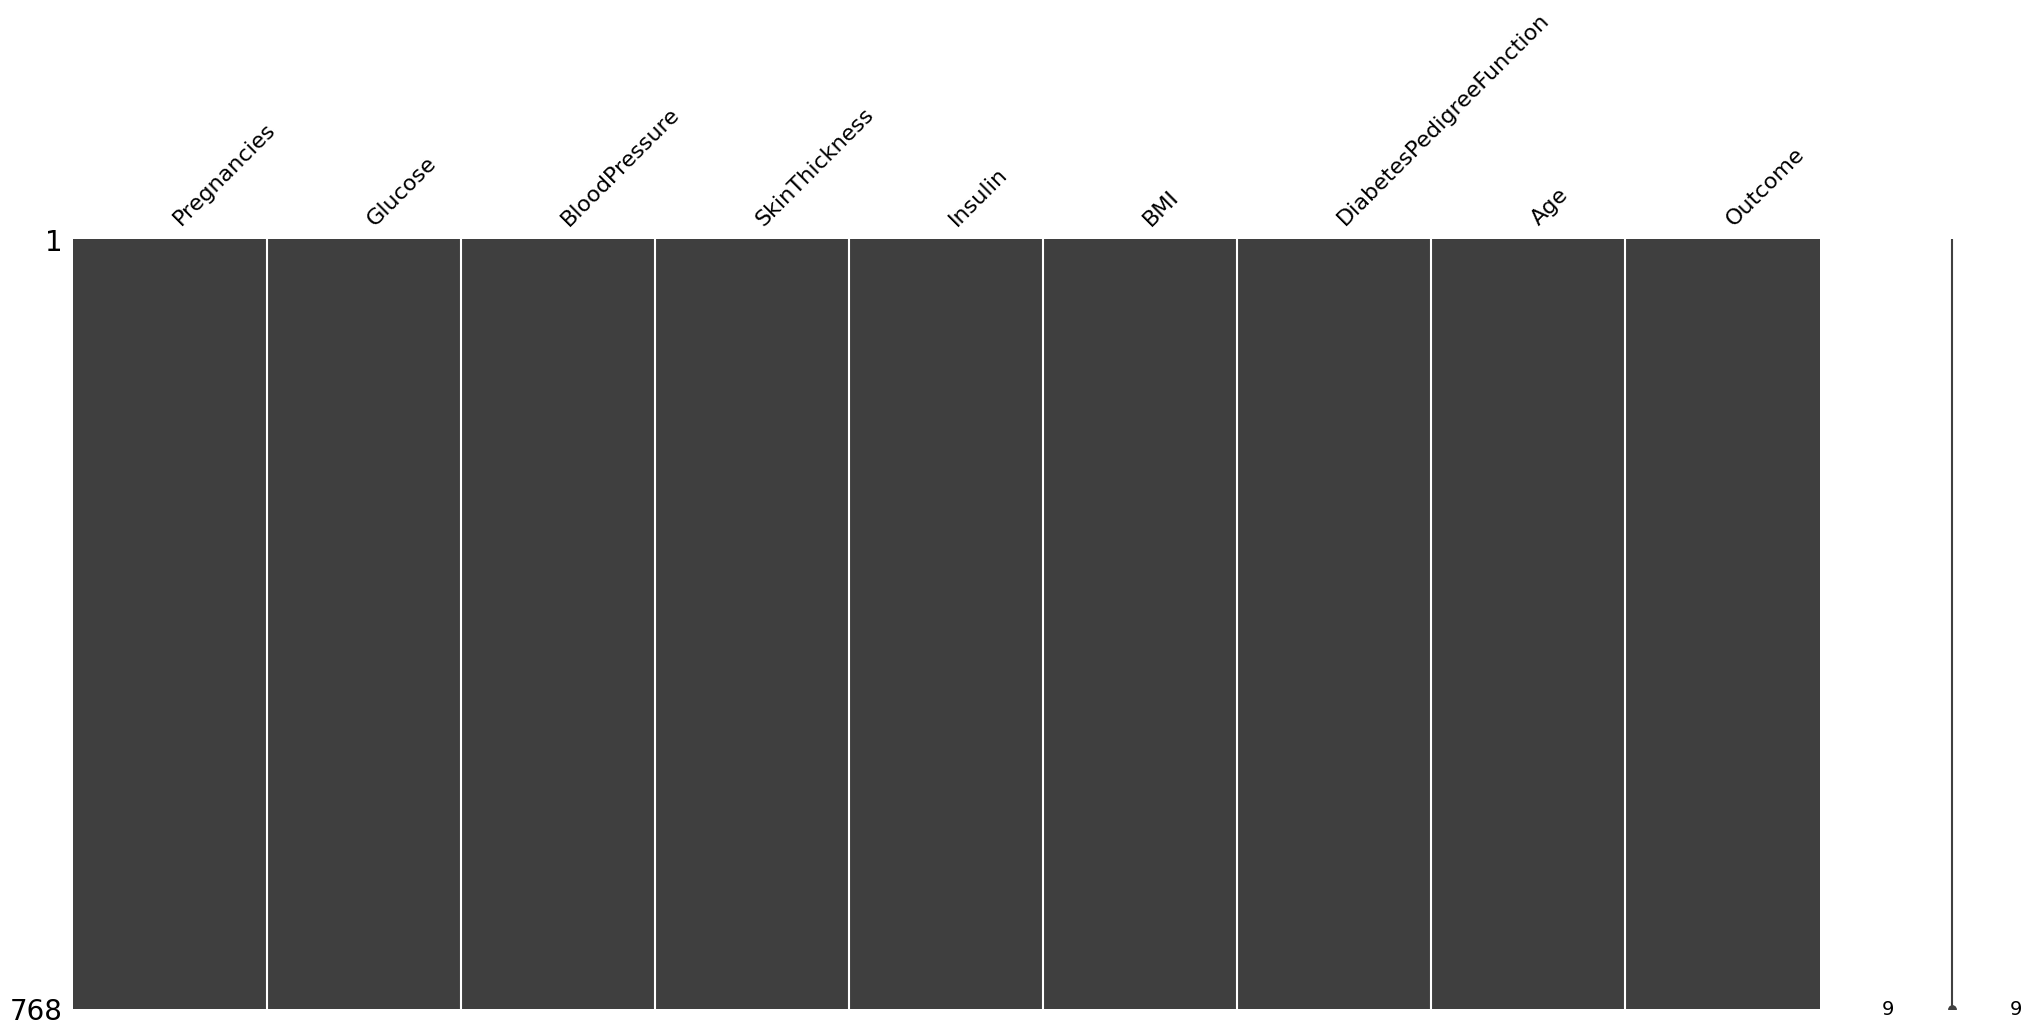

In [23]:
msno.matrix(diabetes_data)

No Null Values

In [24]:
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


**Separating the data and labels**

In [25]:
X = diabetes_data.drop(columns = 'Outcome', axis=1)
Y = diabetes_data['Outcome']

In [28]:
## preprocessing
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
standardized_data=pd.DataFrame(ss.fit_transform(X))


In [29]:
standardized_data.head()

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [30]:
Xnew = standardized_data
Y = diabetes_data['Outcome']

In [32]:
Xnew.head(),Xnew.shape

(          0         1         2         3         4         5         6  \
 0  0.639947  0.848324  0.149641  0.907270 -0.692891  0.204013  0.468492   
 1 -0.844885 -1.123396 -0.160546  0.530902 -0.692891 -0.684422 -0.365061   
 2  1.233880  1.943724 -0.263941 -1.288212 -0.692891 -1.103255  0.604397   
 3 -0.844885 -0.998208 -0.160546  0.154533  0.123302 -0.494043 -0.920763   
 4 -1.141852  0.504055 -1.504687  0.907270  0.765836  1.409746  5.484909   
 
           7  
 0  1.425995  
 1 -0.190672  
 2 -0.105584  
 3 -1.041549  
 4 -0.020496  ,
 (768, 8))

In [35]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xnew, Y, test_size=0.2, random_state=27)

In [36]:
print('xtrain shape',X_train.shape)
print('ytrain shape',y_train.shape)
print('Xtest shape',X_test.shape)
print('Ytest shape',y_test.shape)

xtrain shape (614, 8)
ytrain shape (614,)
Xtest shape (154, 8)
Ytest shape (154,)


In [38]:
## model Training
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [40]:
## model Evaluation
from sklearn.metrics import accuracy_score
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy score of the training data : ', training_data_accuracy)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.7719869706840391
Accuracy score of the test data :  0.7597402597402597


In [42]:
input=(4,110,92,0,0,37.6,0.191,30)
# coverting input data to numpy array
input_data=np.asarray(input)
reshaped_input_data=input_data.reshape(1,-1)
std_data=ss.transform(reshaped_input_data)
prediction=classifier.predict(std_data)
print(prediction)

if (prediction[0]==0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')



[0]
The person is not diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
